In [20]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from lmfit.models import LinearModel
import csv
from lmfit import Model

In [21]:
table_voltage = [1.69812, 1.69521, 1.69177, 1.68786, 1.68352, 1.67880, 1.67376, 1.66845, 1.66292, 1.65721, 1.65134, 1.64529, 1.63905, 1.63263, 1.62602, 1.61920, 1.61220, 1.60506, 1.59782, 1.57928, 1.56027, 1.54097, 1.52166, 1.50272, 1.48443, 1.46700, 1.45048, 1.43488, 1.42013, 1.40615, 1.39287, 1.38021, 1.36809, 1.35647, 1.34530, 1.33453, 1.32412, 1.31403, 1.30422, 1.29464, 1.28527, 1.27607, 1.26702, 1.25810, 1.24928, 1.24053, 1.23184, 1.22314, 1.21440, 1.17705, 1.15558, 1.13598, 1.12463, 1.11896, 1.11517, 1.11212, 1.10945, 1.10702, 1.10263, 1.09864, 1.09490, 1.09131, 1.08781, 1.08436, 1.08093, 1.07748, 1.07402, 1.07053, 1.06700, 1.06346, 1.05988, 1.05629, 1.05267, 1.04353, 1.03425, 1.02482, 1.01525, 1.00552, 0.99565, 0.98564, 0.97550, 0.95487, 0.93383, 0.91243, 0.89072, 0.86873, 0.84650, 0.82404, 0.80138, 0.77855, 0.75554, 0.73238, 0.70908, 0.68564, 0.66208, 0.63841, 0.61465, 0.59080, 0.56690, 0.54294, 0.51892, 0.49484]
table_temperature = [1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 4.6, 4.8, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5,11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]

[[Model]]
    Model(three_lines)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 102
    # variables        = 8
    chi-square         = 88.9580561
    reduced chi-square = 0.94636230
    Akaike info crit   = 2.04560084
    Bayesian info crit = 23.0453833
##  Warning: uncertainties could not be estimated:
    x_breakpoint1:  at initial value
    x_breakpoint2:  at initial value
[[Variables]]
    slope1:        -432.095658 (init = 1)
    intercept1:     515.363220 (init = 1)
    slope2:        -495.057569 (init = 1)
    intercept2:     577.579315 (init = 1)
    slope3:        -36.0753584 (init = 1)
    intercept3:     62.4662937 (init = 1)
    x_breakpoint1:  1.00000000 (init = 1)
    x_breakpoint2:  1.13000000 (init = 1.13)


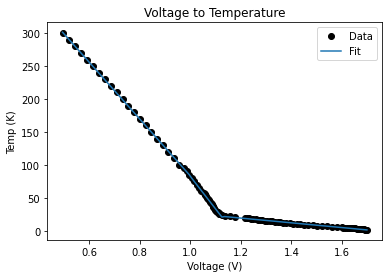

In [22]:
import matplotlib.pyplot as plt
from lmfit import Model
import numpy as np

# Assuming you have the data in the variables table_voltage and table_temperature

# Define the three-line model function
def three_lines(x, slope1, intercept1, slope2, intercept2, slope3, intercept3, x_breakpoint1, x_breakpoint2):
    return np.piecewise(x, [x < x_breakpoint1, (x >= x_breakpoint1) & (x < x_breakpoint2), x >= x_breakpoint2],
                        [lambda x: slope1 * x + intercept1,
                         lambda x: slope2 * x + intercept2,
                         lambda x: slope3 * x + intercept3])

# Create an lmfit model from the function
model = Model(three_lines)

# Set initial parameter values
params = model.make_params(slope1=1, intercept1=1, slope2=1, intercept2=1, slope3=1, intercept3=1, x_breakpoint1=1, x_breakpoint2=1.13)

# Fit the model to the data
result = model.fit(table_temperature, x=table_voltage, params=params)

# Print the fit report
print(result.fit_report())

# Plot the data and the fitted lines
plt.plot(table_voltage, table_temperature, 'o', color='black', label='Data')
plt.plot(table_voltage, result.best_fit, label='Fit')
plt.ylabel(r"Temp (K)")
plt.xlabel(r"Voltage (V)")
plt.title("Voltage to Temperature")
plt.legend()
plt.show()

In [23]:
def read_csv_to_list(file_path):
    data_list = []

    with open(file_path, 'r') as csvfile:
        csv_reader = csv.reader(csvfile)
        for row in csv_reader:
            data_list.append(row)

    return data_list

# Example usage:
csv_file_path = 'lead_transition.csv'
temp_sens_voltage = read_csv_to_list(csv_file_path)

volt = []
for row in temp_sens_voltage:
    for element in row:
        volt.append(float(element))

print(volt)


[1.0, 1.09, 1.09, 1.11, 1.2, 1.26, 1.31, 1.37, 1.4, 1.45, 1.5, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59]


In [24]:
temp = []
for i in volt:
    if i <= 1:
        temp.append(i*-432.095658 + 515.363220)
    elif i >= 1 and i <= 1.13:
        temp.append(i*-495.057569 + 577.579315)
    else:
        temp.append(i*-36.0753584 +  62.4662937)

print(temp)

[83.26756199999994, 37.96656478999989, 37.96656478999989, 28.065413409999906, 19.17586362, 17.011342116, 15.207574196000003, 13.043052691999996, 11.960791940000007, 10.157024020000001, 8.353256100000003, 7.631748932000001, 7.270995348, 6.9102417639999985, 6.549488180000004, 6.188734596000003, 5.827981012000002, 5.467227428000001, 5.106473844]


In [25]:
import csv

# Specify the file path where you want to save the CSV file
csv_file_path = '03_04_2024.csv'

# Open the CSV file in write mode
with open(csv_file_path, 'w', newline='') as csvfile:
    # Create a CSV writer object
    csv_writer = csv.writer(csvfile)

    # Write each float as a new row
    for float_value in temp:
        csv_writer.writerow([float_value])

print(f"CSV file '{csv_file_path}' has been created.")

CSV file '03_04_2024.csv' has been created.


[[Model]]
    Model(three_lines)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 102
    # variables        = 8
    chi-square         = 88.9580561
    reduced chi-square = 0.94636230
    Akaike info crit   = 2.04560084
    Bayesian info crit = 23.0453833
##  Warning: uncertainties could not be estimated:
    x_breakpoint1:  at initial value
    x_breakpoint2:  at initial value
[[Variables]]
    slope1:        -432.095658 (init = 1)
    intercept1:     515.363220 (init = 1)
    slope2:        -495.057569 (init = 1)
    intercept2:     577.579315 (init = 1)
    slope3:        -36.0753584 (init = 1)
    intercept3:     62.4662937 (init = 1)
    x_breakpoint1:  1.00000000 (init = 1)
    x_breakpoint2:  1.13000000 (init = 1.13)


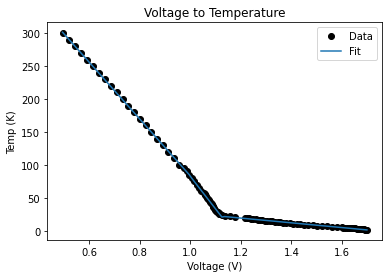

In [8]:
#Niobium

# Assuming you have the data in the variables table_voltage and table_temperature

# Define the three-line model function
def three_lines(x, slope1, intercept1, slope2, intercept2, slope3, intercept3, x_breakpoint1, x_breakpoint2):
    return np.piecewise(x, [x < x_breakpoint1, (x >= x_breakpoint1) & (x < x_breakpoint2), x >= x_breakpoint2],
                        [lambda x: slope1 * x + intercept1,
                         lambda x: slope2 * x + intercept2,
                         lambda x: slope3 * x + intercept3])

# Create an lmfit model from the function
model = Model(three_lines)

# Set initial parameter values
params = model.make_params(slope1=1, intercept1=1, slope2=1, intercept2=1, slope3=1, intercept3=1, x_breakpoint1=1, x_breakpoint2=1.13)

# Fit the model to the data
result = model.fit(table_temperature, x=table_voltage, params=params)

# Print the fit report
print(result.fit_report())

# Plot the data and the fitted lines
plt.plot(table_voltage, table_temperature, 'o', color='black', label='Data')
plt.plot(table_voltage, result.best_fit, label='Fit')
plt.ylabel(r"Temp (K)")
plt.xlabel(r"Voltage (V)")
plt.title("Voltage to Temperature")
plt.legend()
plt.show()

Fit Report (First Three Points):
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 3
    # variables        = 2
    chi-square         = 0.57293945
    reduced chi-square = 0.57293945
    Akaike info crit   = -0.96676257
    Bayesian info crit = -2.76953800
[[Variables]]
    slope:      0.10956761 +/- 0.09193843 (83.91%) (init = 1)
    intercept:  53.6728856 +/- 1.14437387 (2.13%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.924
Fit Report (Next Eight Points):
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 8
    # variables        = 2
    chi-square         = 0.03835022
    reduced chi-square = 0.00639170
    Akaike info crit   = -38.7234922
    Bayesian info crit = -38.5646091
[[Variables]]
    slope:      0.00232270 +/- 0.00361156 (155.49%) (init = 1)
    intercept:  16.

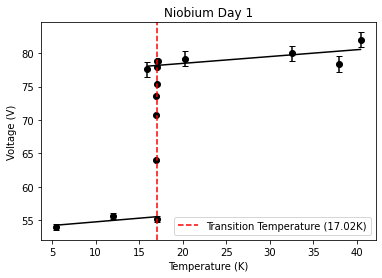

In [199]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

def linear(x, slope, intercept):
    return slope * x + intercept

# Load data from a CSV file
csv_file_path = 'temp_data_2_15.csv'  # Replace with the path to your CSV file
table_voltage = []
table_temperature = []

with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for i, row in enumerate(csv_reader):
        table_voltage.append(float(row['x']))
        table_temperature.append(float(row['y']))

# Create an lmfit model from the function
model = Model(linear)

# Set initial parameter values
params_first_three = model.make_params(slope=1, intercept=1)
params_next_eight = model.make_params(slope=1, intercept=1)
params_last_four = model.make_params(slope=1, intercept=1)

# Fit the model to the first three points
result_first_three = model.fit(table_temperature[:3], x=table_voltage[:3], params=params_first_three)

# Fit the model to the next eight points
result_next_eight = model.fit(table_voltage[2:10], x=table_temperature[2:10], params=params_next_eight)

# Fit the model to the last four points
result_last_four = model.fit(table_temperature[10:], x=table_voltage[10:], params=params_last_four)

# Print the fit reports
print("Fit Report (First Three Points):")
print(result_first_three.fit_report())

print("Fit Report (Next Eight Points):")
print(result_next_eight.fit_report())

print("Fit Report (Last Four Points):")
print(result_last_four.fit_report())

# Calculate the average position for the middle points
middle_avg_voltage = np.mean(table_voltage[2:10])


# Retrieve the residuals
residuals_first_three = result_first_three.residual

# Calculate the standard deviation of residuals
std_residuals_first_three = np.std(residuals_first_three)

# Add error bars to the original data centered on the data points
plt.errorbar(table_voltage[:3],  table_temperature[:3], yerr=std_residuals_first_three, fmt='none', color='black', capsize=3)

# Retrieve the residuals
residuals_last_four = result_last_four.residual

# Calculate the standard deviation of residuals
std_residuals_last_four = np.std(residuals_last_four)

# Add error bars to the original data centered on the data points
plt.errorbar(table_voltage[10:],  table_temperature[10:], yerr=std_residuals_last_four, fmt='none', color='black', capsize=3)


# Plot the data and the fitted lines
plt.plot(table_voltage, table_temperature, 'o', color='black')
plt.plot(table_voltage[:3], result_first_three.best_fit, color = 'black')
plt.axvline(x=middle_avg_voltage, color='red', linestyle='--', label=f'Transition Temperature ({middle_avg_voltage:.2f}K)')  # Draw vertical dashed line at the average voltage
plt.plot(table_voltage[10:], result_last_four.best_fit, color='black')
plt.ylabel(r"Voltage (V)")
plt.xlabel(r"Temperature (K)")
plt.title("Niobium Day 1")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[Model]]
    Model(logistic_curve)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 567
    # data points      = 10
    # variables        = 4
    chi-square         = 314.064640
    reduced chi-square = 52.3441066
    Akaike info crit   = 42.4701373
    Bayesian info crit = 43.6804777
[[Variables]]
    a:  598.559015 +/- 1966683.40 (328569.67%) (init = 81)
    b:  93.6764941 +/- 141302.988 (150841.46%) (init = 20)
    c:  0.03269402 +/- 17.7748300 (54367.22%) (init = 0.01)
    d:  20.7731926 +/- 13195.2257 (63520.45%) (init = 60)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = 1.000
    C(b, c) = -1.000
    C(a, c) = -1.000
    C(c, d) = 1.000
    C(b, d) = -0.999
    C(a, d) = -0.999


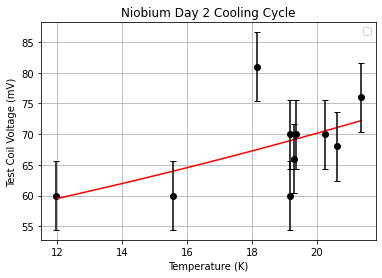

In [197]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model

def plot_csv_and_fit_logistic_curve(csv_file_path):
    x_values = []
    y_values = []

    with open(csv_file_path, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            # Assuming the CSV has columns 'x' and 'y', modify if needed
            x_values.append(float(row['x']))
            y_values.append(float(row['y']))

    # Plotting the original data
    plt.plot(x_values, y_values, marker='o', linestyle='', color = 'black')
    plt.title('Niobium Day 2 Cooling Cycle')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Test Coil Voltage (mV)')
    plt.grid(True)

    # Define the logistic curve model function
    def logistic_curve(x, a, b, c, d):
        return a / (1 + np.exp(-c * (x - b))) + d

    # Create a lmfit model using the logistic curve function
    model = Model(logistic_curve)

    # Set initial parameter values
    params = model.make_params(a=max(y_values), b=20, c=0.01, d=min(y_values))

    # Fit the model to the data
    result = model.fit(y_values, params, x=x_values, method='leastsq')

    # Print fitting results
    print(result.fit_report())

    # Plot the fitted logistic curve
    x_fit = np.linspace(min(x_values), max(x_values), 100)
    y_fit = result.eval(x=x_fit)
    plt.plot(x_fit, y_fit, color='red')

    
    # Retrieve the residuals
    residuals = result.residual

    # Calculate the standard deviation of residuals
    std_residuals = np.std(residuals)

    # Add error bars to the original data centered on the data points
    plt.errorbar(x_values, y_values, yerr=std_residuals, fmt='none', color='black', capsize=3)

    plt.legend()
    plt.show()

# Replace 'temp_data_2_15.csv' with the path to your CSV file
csv_file_path = 'temp_data_day_2.csv'
plot_csv_and_fit_logistic_curve(csv_file_path)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[Model]]
    Model(logistic_curve)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 9
    # variables        = 4
    chi-square         = 266.000000
    reduced chi-square = 53.2000000
    Akaike info crit   = 38.4764456
    Bayesian info crit = 39.2653439
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a:  125.457928 (init = 81)
    b:  364.961984 (init = 20)
    c:  0.15816566 (init = 0.01)
    d:  71.3333333 (init = 60)


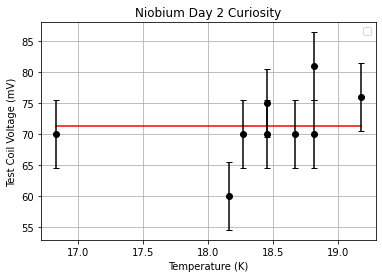

In [195]:
def plot_csv_and_fit_logistic_curve(csv_file_path):
    x_values = []
    y_values = []

    with open(csv_file_path, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            # Assuming the CSV has columns 'x' and 'y', modify if needed
            x_values.append(float(row['x']))
            y_values.append(float(row['y']))

    # Plotting the original data
    plt.plot(x_values, y_values, marker='o', linestyle='', color = 'black')
    plt.title('Niobium Day 2 Curiosity')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Test Coil Voltage (mV)')
    plt.grid(True)

    # Define the logistic curve model function
    def logistic_curve(x, a, b, c, d):
        return a / (1 + np.exp(-c * (x - b))) + d

    # Create a lmfit model using the logistic curve function
    model = Model(logistic_curve)

    # Set initial parameter values
    params = model.make_params(a=max(y_values), b=20, c=0.01, d=min(y_values))

    # Fit the model to the data
    result = model.fit(y_values, params, x=x_values, method='leastsq')

    # Print fitting results
    print(result.fit_report())

    # Plot the fitted logistic curve
    x_fit = np.linspace(min(x_values), max(x_values), 100)
    y_fit = result.eval(x=x_fit)
    plt.plot(x_fit, y_fit, color='red')

    
    # Retrieve the residuals
    residuals = result.residual

    # Calculate the standard deviation of residuals
    std_residuals = np.std(residuals)

    # Add error bars to the original data centered on the data points
    plt.errorbar(x_values, y_values, yerr=std_residuals, fmt='none', color='black', capsize=3)

    plt.legend()
    plt.show()

# Replace 'temp_data_2_15.csv' with the path to your CSV file
csv_file_path = 'niobium_2_cooling.csv'
plot_csv_and_fit_logistic_curve(csv_file_path)

[[Model]]
    Model(logistic_curve)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1268
    # data points      = 6
    # variables        = 4
    chi-square         = 1.20001287
    reduced chi-square = 0.60000643
    Akaike info crit   = -1.65656314
    Bayesian info crit = -2.48952526
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a:  8628.33605 +/-        nan (nan%) (init = 80)
    b:  17.1639260 +/-        nan (nan%) (init = 17)
    c:  39.9465434 +/-        nan (nan%) (init = 0.01)
    d:  60.5999979 +/- 0.38730790 (0.64%) (init = 60)


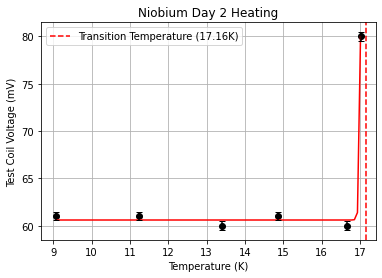

In [218]:
def plot_csv_and_fit_logistic_curve(csv_file_path):
    x_values = []
    y_values = []

    with open(csv_file_path, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            # Assuming the CSV has columns 'x' and 'y', modify if needed
            x_values.append(float(row['x']))
            y_values.append(float(row['y']))

    # Plotting the original data
    plt.plot(x_values, y_values, marker='o', linestyle='', color = 'black')
    plt.title('Niobium Day 2 Heating')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Test Coil Voltage (mV)')
    plt.grid(True)

    # Define the logistic curve model function
    def logistic_curve(x, a, b, c, d):
        return a / (1 + np.exp(-c * (x - b))) + d

    # Create a lmfit model using the logistic curve function
    model = Model(logistic_curve)

    # Set initial parameter values
    params = model.make_params(a=max(y_values), b=17, c=0.01, d=min(y_values))

    # Fit the model to the data
    result = model.fit(y_values, params, x=x_values, method='leastsq')

    # Print fitting results
    print(result.fit_report())

    # Plot the fitted logistic curve
    x_fit = np.linspace(min(x_values), max(x_values), 100)
    y_fit = result.eval(x=x_fit)
    plt.plot(x_fit, y_fit, color='red')

    
    # Retrieve the residuals
    residuals = result.residual

    # Calculate the standard deviation of residuals
    std_residuals = np.std(residuals)


    # Add error bars to the original data centered on the data points
    plt.errorbar(x_values, y_values, yerr=std_residuals, fmt='none', color='black', capsize=3)

    plt.axvline(x=17.1639260, color='red', linestyle='--', label=f'Transition Temperature (17.16K)')  # Draw vertical dashed line at the average voltage

    plt.legend()
    plt.show()

# Replace 'temp_data_2_15.csv' with the path to your CSV file
csv_file_path = 'niobium_2_heating.csv'
plot_csv_and_fit_logistic_curve(csv_file_path)

[[Model]]
    Model(logistic_curve)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 359
    # data points      = 15
    # variables        = 4
    chi-square         = 3092.30772
    reduced chi-square = 281.118884
    Akaike info crit   = 87.9293409
    Bayesian info crit = 90.7615417
[[Variables]]
    a:  127.232878 +/- 18.0571521 (14.19%) (init = 406)
    b:  4.02865747 +/- 69507.0249 (1725314.83%) (init = 4)
    c:  54.1849349 +/- 19131654.5 (35308069.48%) (init = 0.01)
    d:  265.997891 +/- 17.1258550 (6.44%) (init = 266)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, c) = -1.000
    C(a, d) = -0.964
    C(a, c) = -0.267
    C(a, b) = 0.267
    C(c, d) = 0.203
    C(b, d) = -0.203


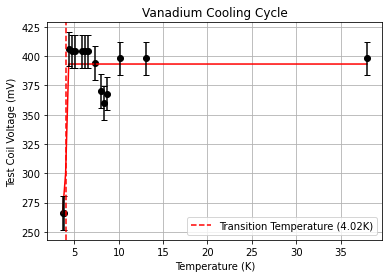

In [213]:


def plot_csv_and_fit_logistic_curve(csv_file_path):
    x_values = []
    y_values = []

    with open(csv_file_path, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            # Assuming the CSV has columns 'x' and 'y', modify if needed
            x_values.append(float(row['x']))
            y_values.append(float(row['y']))

    # Plotting the original data
    plt.plot(x_values, y_values, marker='o', linestyle='', color = 'black')
    plt.title('Vanadium Cooling Cycle')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Test Coil Voltage (mV)')
    plt.grid(True)

    # Define the logistic curve model function
    def logistic_curve(x, a, b, c, d):
        return a / (1 + np.exp(-c * (x - b))) + d

    # Create a lmfit model using the logistic curve function
    model = Model(logistic_curve)

    # Set initial parameter values
    params = model.make_params(a=max(y_values), b=4, c=0.01, d=min(y_values))

    # Fit the model to the data
    result = model.fit(y_values, params, x=x_values, method='leastsq')

    # Print fitting results
    print(result.fit_report())

    # Plot the fitted logistic curve
    x_fit = np.linspace(min(x_values), max(x_values), 100)
    y_fit = result.eval(x=x_fit)
    plt.plot(x_fit, y_fit, color='red')

    
    # Retrieve the residuals
    residuals = result.residual

    # Calculate the standard deviation of residuals
    std_residuals = np.std(residuals)

    # Add error bars to the original data centered on the data points
    plt.errorbar(x_values, y_values, yerr=std_residuals, fmt='none', color='black', capsize=3)


    plt.axvline(x=4.02865747, color='red', linestyle='--', label=f'Transition Temperature (4.02K)')  # Draw vertical dashed line at the average voltage


    plt.legend()
    plt.show()

# Replace 'temp_data_2_15.csv' with the path to your CSV file
csv_file_path = 'vanadium_data.csv'
plot_csv_and_fit_logistic_curve(csv_file_path)

[[Model]]
    Model(logistic_curve)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 214
    # data points      = 6
    # variables        = 4
    chi-square         = 976.300295
    reduced chi-square = 488.150147
    Akaike info crit   = 38.5520645
    Bayesian info crit = 37.7191024
[[Variables]]
    a:  105.519274 +/- 27.0540324 (25.64%) (init = 402)
    b:  7.70186146 +/- 0.26970794 (3.50%) (init = 4)
    c:  3.47475602 +/- 3.41764764 (98.36%) (init = 0.01)
    d:  296.066789 +/- 15.4049372 (5.20%) (init = 280)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, d) = -0.577
    C(c, d) = 0.509
    C(a, c) = -0.380
    C(b, d) = 0.311
    C(a, b) = 0.196
    C(b, c) = -0.188


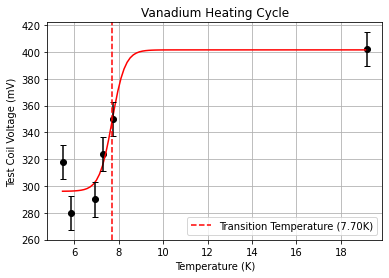

In [214]:

def plot_csv_and_fit_logistic_curve(csv_file_path):
    x_values = []
    y_values = []

    with open(csv_file_path, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            # Assuming the CSV has columns 'x' and 'y', modify if needed
            x_values.append(float(row['x']))
            y_values.append(float(row['y']))

    # Plotting the original data
    plt.plot(x_values, y_values, marker='o', linestyle='', color = 'black')
    plt.title('Vanadium Heating Cycle')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Test Coil Voltage (mV)')
    plt.grid(True)

    # Define the logistic curve model function
    def logistic_curve(x, a, b, c, d):
        return a / (1 + np.exp(-c * (x - b))) + d

    # Create a lmfit model using the logistic curve function
    model = Model(logistic_curve)

    # Set initial parameter values
    params = model.make_params(a=max(y_values), b=4, c=0.01, d=min(y_values))

    # Fit the model to the data
    result = model.fit(y_values, params, x=x_values, method='leastsq')

    # Print fitting results
    print(result.fit_report())

    # Plot the fitted logistic curve
    x_fit = np.linspace(min(x_values), max(x_values), 100)
    y_fit = result.eval(x=x_fit)
    plt.plot(x_fit, y_fit, color='red')
    
    # Retrieve the residuals
    residuals = result.residual

    # Calculate the standard deviation of residuals
    std_residuals = np.std(residuals)

    # Add error bars to the original data centered on the data points
    plt.errorbar(x_values, y_values, yerr=std_residuals, fmt='none', color='black', capsize=3)
    plt.axvline(x=7.70186146, color='red', linestyle='--', label=f'Transition Temperature (7.70K)')  # Draw vertical dashed line at the average voltage


    plt.legend()
    plt.show()

# Replace 'temp_data_2_15.csv' with the path to your CSV file
csv_file_path = 'cooling_van_data.csv'
plot_csv_and_fit_logistic_curve(csv_file_path)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[Model]]
    Model(logistic_curve)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2054
    # data points      = 22
    # variables        = 4
    chi-square         = 452.933158
    reduced chi-square = 25.1629532
    Akaike info crit   = 74.5434463
    Bayesian info crit = 78.9076162
[[Variables]]
    a:  299626.343 +/- 3.6335e+08 (121266.13%) (init = 390)
    b: -227.694543 +/- 36127.8513 (15866.81%) (init = 17)
    c:  0.03366718 +/- 0.01415121 (42.03%) (init = 0.4)
    d: -299234.271 +/- 3.6335e+08 (121425.02%) (init = 260)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, d) = -1.000
    C(b, d) = 1.000
    C(a, b) = -1.000
    C(b, c) = 0.978
    C(c, d) = 0.978
    C(a, c) = -0.978


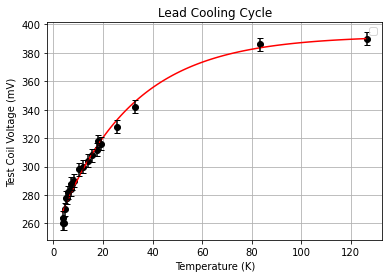

In [191]:


def plot_csv_and_fit_logistic_curve(csv_file_path):
    x_values = []
    y_values = []

    with open(csv_file_path, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            # Assuming the CSV has columns 'x' and 'y', modify if needed
            x_values.append(float(row['x']))
            y_values.append(float(row['y']))

    # Plotting the original data
    plt.plot(x_values, y_values, marker='o', linestyle='', color = 'black')
    plt.title('Lead Cooling Cycle')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Test Coil Voltage (mV)')
    plt.grid(True)

    # Define the logistic curve model function
    def logistic_curve(x, a, b, c, d):
        return a / (1 + np.exp(-c * (x - b))) + d

    # Create a lmfit model using the logistic curve function
    model = Model(logistic_curve)

    # Set initial parameter values
    params = model.make_params(a=max(y_values), b=17, c=0.4, d=min(y_values))

    # Fit the model to the data
    result = model.fit(y_values, params, x=x_values, method='leastsq')

    # Print fitting results
    print(result.fit_report())

    # Plot the fitted logistic curve
    x_fit = np.linspace(min(x_values), max(x_values), 100)
    y_fit = result.eval(x=x_fit)
    plt.plot(x_fit, y_fit, color='red')

    
    # Retrieve the residuals
    residuals = result.residual

    # Calculate the standard deviation of residuals
    std_residuals = np.std(residuals)

    # Add error bars to the original data centered on the data points
    plt.errorbar(x_values, y_values, yerr=std_residuals, fmt='none', color='black', capsize=3)

    plt.legend()
    plt.show()

# Replace 'temp_data_2_15.csv' with the path to your CSV file
csv_file_path = 'lead_data.csv'
plot_csv_and_fit_logistic_curve(csv_file_path)

[[Model]]
    Model(logistic_curve)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 18
    # variables        = 4
    chi-square         = 1890.19912
    reduced chi-square = 135.014223
    Akaike info crit   = 91.7731826
    Bayesian info crit = 95.3346696
[[Variables]]
    a:  130.873626 +/- 7.95962965 (6.08%) (init = 398)
    b:  17.7877263 +/- 0.35858435 (2.02%) (init = 17)
    c:  0.55922736 +/- 0.12178514 (21.78%) (init = 0.4)
    d:  264.172249 +/- 5.16055284 (1.95%) (init = 264)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, d) = -0.681
    C(b, d) = 0.467
    C(a, c) = -0.439
    C(c, d) = 0.394
    C(b, c) = 0.131


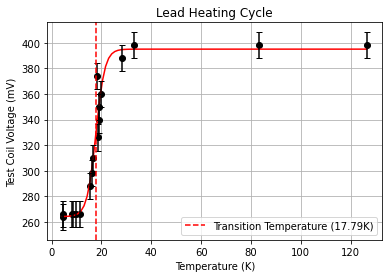

In [215]:

def plot_csv_and_fit_logistic_curve(csv_file_path):
    x_values = []
    y_values = []

    with open(csv_file_path, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            # Assuming the CSV has columns 'x' and 'y', modify if needed
            x_values.append(float(row['x']))
            y_values.append(float(row['y']))

    # Plotting the original data
    plt.plot(x_values, y_values, marker='o', linestyle='', color = 'black')
    plt.title('Lead Heating Cycle')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Test Coil Voltage (mV)')
    plt.grid(True)

    # Define the logistic curve model function
    def logistic_curve(x, a, b, c, d):
        return a / (1 + np.exp(-c * (x - b))) + d

    # Create a lmfit model using the logistic curve function
    model = Model(logistic_curve)

    # Set initial parameter values
    params = model.make_params(a=max(y_values), b=17, c=0.4, d=min(y_values))

    # Fit the model to the data
    result = model.fit(y_values, params, x=x_values, method='leastsq')

    # Print fitting results
    print(result.fit_report())

    # Plot the fitted logistic curve
    x_fit = np.linspace(min(x_values), max(x_values), 100)
    y_fit = result.eval(x=x_fit)
    plt.plot(x_fit, y_fit, color='red')

    
    # Retrieve the residuals
    residuals = result.residual

    # Calculate the standard deviation of residuals
    std_residuals = np.std(residuals)

    # Add error bars to the original data centered on the data points
    plt.errorbar(x_values, y_values, yerr=std_residuals, fmt='none', color='black', capsize=3)
    plt.axvline(x=17.7877263, color='red', linestyle='--', label=f'Transition Temperature (17.79K)')  # Draw vertical dashed line at the average voltage


    plt.legend()
    plt.show()

# Replace 'temp_data_2_15.csv' with the path to your CSV file
csv_file_path = 'lead_data_heating.csv'
plot_csv_and_fit_logistic_curve(csv_file_path)

[[Model]]
    Model(logistic_curve)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 354
    # data points      = 9
    # variables        = 4
    chi-square         = 901.415477
    reduced chi-square = 180.283095
    Akaike info crit   = 49.4606753
    Bayesian info crit = 50.2495736
[[Variables]]
    a:  38.8391514 +/- 12.0702845 (31.08%) (init = 250)
    b:  6.73877609 +/- 0.26808396 (3.98%) (init = 17)
    c:  5.58230778 +/- 6.72805863 (120.52%) (init = 0.4)
    d:  189.384635 +/- 9.04822910 (4.78%) (init = 180)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, d) = -0.797
    C(a, c) = -0.530
    C(b, d) = 0.449
    C(c, d) = 0.448
    C(a, b) = -0.134


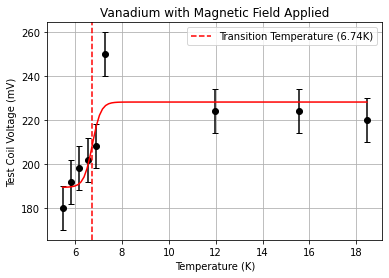

In [217]:

def plot_csv_and_fit_logistic_curve(csv_file_path):
    x_values = []
    y_values = []

    with open(csv_file_path, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            # Assuming the CSV has columns 'x' and 'y', modify if needed
            x_values.append(float(row['x']))
            y_values.append(float(row['y']))

    # Plotting the original data
    plt.plot(x_values, y_values, marker='o', linestyle='', color = 'black')
    plt.title('Vanadium with Magnetic Field Applied')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Test Coil Voltage (mV)')
    plt.grid(True)

    # Define the logistic curve model function
    def logistic_curve(x, a, b, c, d):
        return a / (1 + np.exp(-c * (x - b))) + d

    # Create a lmfit model using the logistic curve function
    model = Model(logistic_curve)

    # Set initial parameter values
    params = model.make_params(a=max(y_values), b=17, c=0.4, d=min(y_values))

    # Fit the model to the data
    result = model.fit(y_values, params, x=x_values, method='leastsq')

    # Retrieve the residuals
    residuals = result.residual

    # Calculate the standard deviation of residuals
    std_residuals = np.std(residuals)

    # Add error bars to the original data centered on the data points
    plt.errorbar(x_values, y_values, yerr=std_residuals, fmt='none', color='black', capsize=3)

    # Print fitting results
    print(result.fit_report())

    # Plot the fitted logistic curve
    x_fit = np.linspace(min(x_values), max(x_values), 100)
    y_fit = result.eval(x=x_fit)
    plt.plot(x_fit, y_fit, color='red')

    plt.axvline(x=6.73877609, color='red', linestyle='--', label=f'Transition Temperature (6.74K)')  # Draw vertical dashed line at the average voltage


    plt.legend()
    plt.show()

# Replace 'temp_data_2_15.csv' with the path to your CSV file
csv_file_path = 'van_data.csv'
plot_csv_and_fit_logistic_curve(csv_file_path)

[[Model]]
    Model(logistic_curve)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 69
    # data points      = 19
    # variables        = 4
    chi-square         = 855.767632
    reduced chi-square = 57.0511754
    Akaike info crit   = 80.3436381
    Bayesian info crit = 84.1213941
[[Variables]]
    a:  84.7140373 +/- 13.5196167 (15.96%) (init = 262)
    b:  31.3991095 +/- 3.74471990 (11.93%) (init = 17)
    c:  0.09729413 +/- 0.03624096 (37.25%) (init = 0.4)
    d:  178.036810 +/- 9.18859269 (5.16%) (init = 178)
[[Correlations]] (unreported correlations are < 0.100)
    C(c, d) = 0.915
    C(a, c) = -0.848
    C(a, d) = -0.817
    C(b, d) = 0.610
    C(b, c) = 0.347
    C(a, b) = -0.150


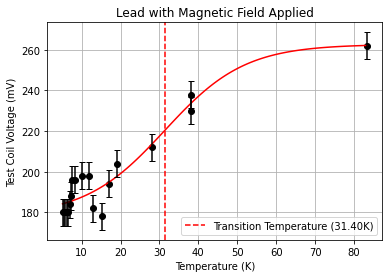

In [216]:

def plot_csv_and_fit_logistic_curve(csv_file_path):
    x_values = []
    y_values = []

    with open(csv_file_path, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            # Assuming the CSV has columns 'x' and 'y', modify if needed
            x_values.append(float(row['x']))
            y_values.append(float(row['y']))

    # Plotting the original data
    plt.plot(x_values, y_values, marker='o', linestyle='', color = 'black')
    plt.title('Lead with Magnetic Field Applied')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Test Coil Voltage (mV)')
    plt.grid(True)

    # Define the logistic curve model function
    def logistic_curve(x, a, b, c, d):
        return a / (1 + np.exp(-c * (x - b))) + d

    # Create a lmfit model using the logistic curve function
    model = Model(logistic_curve)

    # Set initial parameter values
    params = model.make_params(a=max(y_values), b=17, c=0.4, d=min(y_values))

    # Fit the model to the data
    result = model.fit(y_values, params, x=x_values, method='leastsq')

    # Print fitting results
    print(result.fit_report())

    # Plot the fitted logistic curve
    x_fit = np.linspace(min(x_values), max(x_values), 100)
    y_fit = result.eval(x=x_fit)
    plt.plot(x_fit, y_fit, color='red')

     # Retrieve the residuals
    residuals = result.residual

    # Calculate the standard deviation of residuals
    std_residuals = np.std(residuals)

    # Add error bars to the original data centered on the data points
    plt.errorbar(x_values, y_values, yerr=std_residuals, fmt='none', color='black', capsize=3)

    plt.axvline(x=31.3991095, color='red', linestyle='--', label=f'Transition Temperature (31.40K)')  # Draw vertical dashed line at the average voltage



    plt.legend()
    plt.show()

# Replace 'temp_data_2_15.csv' with the path to your CSV file
csv_file_path = 'lead_tc_data.csv'
plot_csv_and_fit_logistic_curve(csv_file_path)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[Model]]
    Model(logistic_curve)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 185
    # data points      = 5
    # variables        = 4
    chi-square         = 547.000114
    reduced chi-square = 547.000114
    Akaike info crit   = 31.4750555
    Bayesian info crit = 29.9128071
[[Variables]]
    a:  159.274380 +/- 9.0545e+09 (5684842954.61%) (init = 200)
    b:  18.9344102 +/- 33107901.8 (174855733.68%) (init = 17)
    c:  2.09232878 +/- 1412854.16 (67525437.46%) (init = 0.4)
    d:  173.499976 +/- 89.6985722 (51.70%) (init = 162)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = 1.000
    C(b, c) = -0.990
    C(a, c) = -0.990
    C(a, d) = 0.913
    C(b, d) = 0.912
    C(c, d) = -0.848


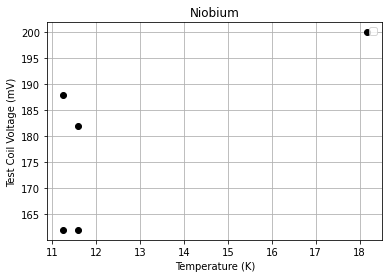

In [35]:

def plot_csv_and_fit_logistic_curve(csv_file_path):
    x_values = []
    y_values = []

    with open(csv_file_path, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            # Assuming the CSV has columns 'x' and 'y', modify if needed
            x_values.append(float(row['x']))
            y_values.append(float(row['y']))

    # Plotting the original data
    plt.plot(x_values, y_values, marker='o', linestyle='', color = 'black')
    plt.title('Niobium')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Test Coil Voltage (mV)')
    plt.grid(True)

    # Define the logistic curve model function
    def logistic_curve(x, a, b, c, d):
        return a / (1 + np.exp(-c * (x - b))) + d

    # Create a lmfit model using the logistic curve function
    model = Model(logistic_curve)

    # Set initial parameter values
    params = model.make_params(a=max(y_values), b=17, c=0.4, d=min(y_values))

    # Fit the model to the data
    result = model.fit(y_values, params, x=x_values, method='leastsq')

    # Print fitting results
    print(result.fit_report())

    # Plot the fitted logistic curve
    # x_fit = np.linspace(min(x_values), max(x_values), 100)
    # y_fit = result.eval(x=x_fit)
    # plt.plot(x_fit, y_fit, color='red')

    plt.legend()
    plt.show()

# Replace 'temp_data_2_15.csv' with the path to your CSV file
csv_file_path = 'nio_4_data.csv'
plot_csv_and_fit_logistic_curve(csv_file_path)

[[Model]]
    Model(logistic_curve)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 59
    # variables        = 4
    chi-square         = 1.3797e-05
    reduced chi-square = 2.5085e-07
    Akaike info crit   = -892.848878
    Bayesian info crit = -884.538728
##  Warning: uncertainties could not be estimated:
    b:  at initial value
    c:  at initial value
[[Variables]]
    a: -48.1285711 (init = 0.009)
    b:  17.0000000 (init = 17)
    c:  0.40000000 (init = 0.4)
    d:  48.1371981 (init = 0.008)


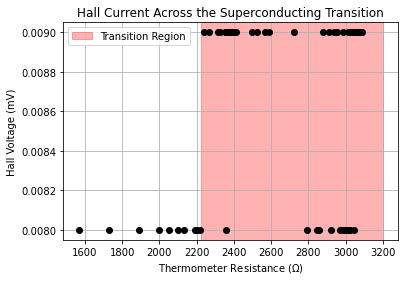

In [189]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

def plot_csv_and_fit_logistic_curve(csv_file_path):
    x_values = []
    y_values = []

    with open(csv_file_path, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            # Assuming the CSV has columns 'x' and 'y', modify if needed
            x_values.append(float(row['x']))
            y_values.append(float(row['y']))

    # Plotting the original data
    plt.plot(x_values, y_values, marker='o', linestyle='', color='black')
    plt.title('Hall Current Across the Superconducting Transition')
    plt.xlabel('Thermometer Resistance ($\Omega$)')
    plt.ylabel('Hall Voltage (mV)')
    plt.grid(True)

    # Define the logistic curve model function
    def logistic_curve(x, a, b, c, d):
        return a / (1 + np.exp(-c * (x - b))) + d

    # Create an lmfit model using the logistic curve function
    model = Model(logistic_curve)

    # Set initial parameter values
    params = model.make_params(a=max(y_values), b=17, c=0.4, d=min(y_values))

    # Fit the model to the data
    result = model.fit(y_values, params, x=x_values, method='leastsq')

    # Print fitting results
    print(result.fit_report())

   # Retrieve the residuals
    residuals = result.residual



    # Add a red rectangle to the plot from x=2250 to x=3200
    plt.axvspan(2225, 3200, color='red', alpha=0.3, label='Transition Region')


    plt.legend()
    plt.show()

# Replace 'heating_cycle_probe_2.csv' with the path to your CSV file
csv_file_path = 'heating_cycle_probe_2.csv'
plot_csv_and_fit_logistic_curve(csv_file_path)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[Model]]
    Model(logistic_curve)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 74
    # data points      = 14
    # variables        = 4
    chi-square         = 1.5821e-06
    reduced chi-square = 1.5821e-07
    Akaike info crit   = -215.941147
    Bayesian info crit = -213.384918
[[Variables]]
    a:  0.00919057 +/- 4.2475e-04 (4.62%) (init = 1)
    b:  2594.87034 +/- 3.48753016 (0.13%) (init = 2550)
    c:  0.03665127 +/- 0.00454626 (12.40%) (init = 0.1)
    d: -3.2884e-04 +/- 3.5118e-04 (106.79%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, d) = -0.894
    C(a, c) = -0.666
    C(b, d) = 0.658
    C(c, d) = 0.586
    C(a, b) = -0.398
    C(b, c) = 0.174


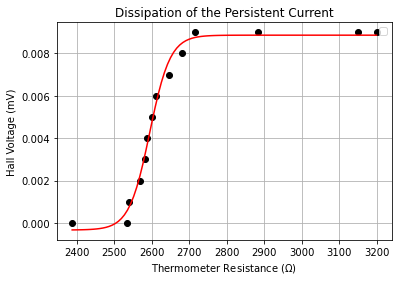

In [169]:

def plot_csv_and_fit_logistic_curve(csv_file_path):
    x_values = []
    y_values = []

    with open(csv_file_path, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            # Assuming the CSV has columns 'x' and 'y', modify if needed
            x_values.append(float(row['x']))
            y_values.append(float(row['y']))

    # Normalize y-values between 0 and 1
    # y_values_normalized = (np.array(y_values) - min(y_values)) / (max(y_values) - min(y_values))

    # Plotting the original data
    plt.plot(x_values, y_values, marker='o', linestyle='', color='black')
    plt.title('Dissipation of the Persistent Current')
    plt.xlabel('Thermometer Resistance ($\Omega$)')
    plt.ylabel('Hall Voltage (mV)')
    plt.grid(True)

    # Define the logistic curve model function
    def logistic_curve(x, a, b, c, d):
        return a / (1 + np.exp(-c * (x - b))) + d

    # Create a lmfit model using the logistic curve function
    model = Model(logistic_curve)

    # Set initial parameter values
    params = model.make_params(a=1, b=2550, c=0.1, d=0)

    # Fit the model to the data
    result = model.fit(y_values, params, x=x_values, method='leastsq')

    # Print fitting results
    print(result.fit_report())

    # Plot the fitted logistic curve
    x_fit = np.linspace(min(x_values), max(x_values), 100)
    y_fit = result.eval(x=x_fit)
    plt.plot(x_fit, y_fit, color='red')

    plt.legend()
    plt.show()

# Replace 'heating_cycle_probe_2.csv' with the path to your CSV file
csv_file_path = 'heating_cycle_act.csv'
plot_csv_and_fit_logistic_curve(csv_file_path)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[Model]]
    Model(logistic_curve)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 74
    # data points      = 14
    # variables        = 4
    chi-square         = 1.5821e-06
    reduced chi-square = 1.5821e-07
    Akaike info crit   = -215.941147
    Bayesian info crit = -213.384918
[[Variables]]
    a:  0.00919057 +/- 4.2475e-04 (4.62%) (init = 1)
    b:  2594.87034 +/- 3.48753016 (0.13%) (init = 2550)
    c:  0.03665127 +/- 0.00454626 (12.40%) (init = 0.1)
    d: -3.2884e-04 +/- 3.5118e-04 (106.79%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, d) = -0.894
    C(a, c) = -0.666
    C(b, d) = 0.658
    C(c, d) = 0.586
    C(a, b) = -0.398
    C(b, c) = 0.174


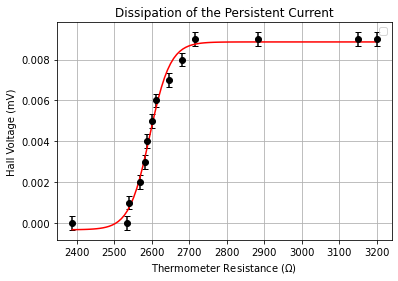

In [188]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

def plot_csv_and_fit_logistic_curve(csv_file_path):
    x_values = []
    y_values = []

    with open(csv_file_path, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        for row in csv_reader:
            # Assuming the CSV has columns 'x' and 'y', modify if needed
            x_values.append(float(row['x']))
            y_values.append(float(row['y']))

    # Plotting the original data with error bars
    plt.errorbar(x_values, y_values, fmt='o', color='black')

    plt.title('Dissipation of the Persistent Current')
    plt.xlabel('Thermometer Resistance ($\Omega$)')
    plt.ylabel('Hall Voltage (mV)')
    plt.grid(True)

    # Define the logistic curve model function
    def logistic_curve(x, a, b, c, d):
        return a / (1 + np.exp(-c * (x - b))) + d

    # Create an lmfit model using the logistic curve function
    model = Model(logistic_curve)

    # Set initial parameter values
    params = model.make_params(a=1, b=2550, c=0.1, d=0)

    # Fit the model to the data
    result = model.fit(y_values, params, x=x_values, method='leastsq')

    # Print fitting results
    print(result.fit_report())

    # Retrieve the residuals
    residuals = result.residual

    # Calculate the standard deviation of residuals
    std_residuals = np.std(residuals)

    # Add error bars to the original data centered on the data points
    plt.errorbar(x_values, y_values, yerr=std_residuals, fmt='none', color='black', capsize=3)

    # Plot the fitted logistic curve
    x_fit = np.linspace(min(x_values), max(x_values), 100)
    y_fit = result.eval(x=x_fit)
    plt.plot(x_fit, y_fit, color='red')

    plt.legend()
    plt.show()

# Replace 'heating_cycle_act.csv' with the path to your CSV file
csv_file_path = 'heating_cycle_act.csv'
plot_csv_and_fit_logistic_curve(csv_file_path)






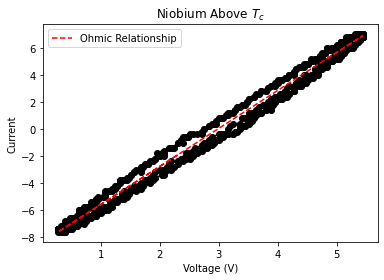

In [225]:
import csv
import matplotlib.pyplot as plt
from lmfit import Model

def linear_model(x, slope, intercept):
    return slope * x + intercept

def fit_and_plot(file_path):
    y1_values = []
    y2_values = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            y1_values.append(float(row[1]))  # Second column values
            y2_values.append(float(row[2]))  # Third column values

    # Plotting
    plt.plot(y1_values, y2_values, marker='o', linestyle='-', color='black')

    # Fitting using lmfit
    model = Model(linear_model)
    params = model.make_params(slope=1, intercept=0)

    result = model.fit(y2_values, x=y1_values, params=params)

    # Plot the fit
    plt.plot(y1_values, result.best_fit, label='Ohmic Relationship', linestyle='--', color='red')

    # Customize plot if needed
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current')
    plt.title('Niobium Above $T_{c}$')
    plt.legend()

    # Show the plot
    plt.show()

# Replace 'your_file.csv' with the actual path to your CSV file
fit_and_plot('NewFile0.csv')



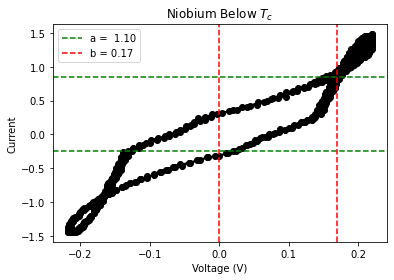

In [263]:
import csv
import matplotlib.pyplot as plt
from lmfit import Model

def logistic_model(x, A, B, C, D):
    return A / (1 + np.exp(-C * (x - D))) + B

def fit_and_plot(file_path):
    y1_values = []
    y2_values = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            y1_values.append(float(row[1]))  # Second column values
            y2_values.append(float(row[2]))  # Third column values

    # Plotting
    plt.plot(y1_values, y2_values, marker='o', linestyle='-', color='black')

    # Fitting using lmfit
    model = Model(logistic_model)
    params = model.make_params(A=max(y2_values), B=min(y2_values), C=1, D=0)

    result = model.fit(y2_values, x=y1_values, params=params)

    # # Plot the fit
    # plt.plot(y1_values, result.best_fit, label='Logistic Fit', linestyle='--', color='red')

    
        # Add horizontal lines
    plt.axhline(y=-0.25, color='green', linestyle='--', label='a =  1.10')
    plt.axhline(y=0.85, color='green', linestyle='--')

    plt.axvline(x=0, color='red', linestyle='--', label='b = 0.17 ')
    plt.axvline(x=0.17, color='red', linestyle='--')


    # Customize plot if needed
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current')
    plt.title('Niobium Below $T_{c}$')
    plt.legend()


    # Show the plot
    plt.show()

# Replace 'your_file.csv' with the actual path to your CSV file
fit_and_plot('NewFile2.csv')


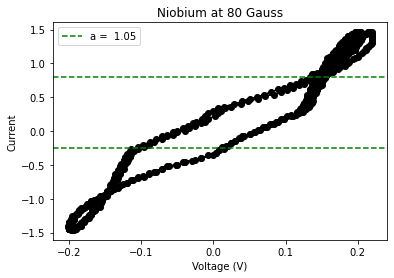

In [272]:
def linear_model(x, slope, intercept):
    return slope * x + intercept

def fit_and_plot(file_path):
    y1_values = []
    y2_values = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            y1_values.append(float(row[1]))  # Second column values
            y2_values.append(float(row[2]))  # Third column values

    # Plotting
    plt.plot(y1_values, y2_values, marker='o', linestyle='-', color='black')

    # Fitting using lmfit
    model = Model(linear_model)
    params = model.make_params(slope=1, intercept=0)

    result = model.fit(y2_values, x=y1_values, params=params)

    # Plot the fit
    # plt.plot(y1_values, result.best_fit, label='Ohmic Relationship', linestyle='--', color='red')

         # Add horizontal lines
    plt.axhline(y=-0.25, color='green', linestyle='--', label='a =  1.05')
    plt.axhline(y=0.80, color='green', linestyle='--')

    # Customize plot if needed
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current')
    plt.title('Niobium at 80 Gauss')
    plt.legend()

    # Show the plot
    plt.show()

# Replace 'your_file.csv' with the actual path to your CSV file
fit_and_plot('NewFile3.csv')

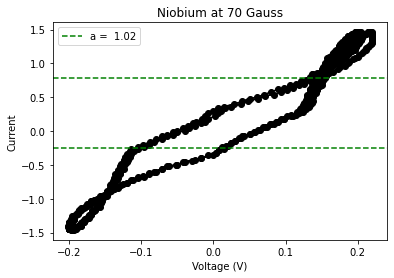

In [273]:
def linear_model(x, slope, intercept):
    return slope * x + intercept

def fit_and_plot(file_path):
    y1_values = []
    y2_values = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            y1_values.append(float(row[1]))  # Second column values
            y2_values.append(float(row[2]))  # Third column values

    # Plotting
    plt.plot(y1_values, y2_values, marker='o', linestyle='-', color='black')

    # Fitting using lmfit
    model = Model(linear_model)
    params = model.make_params(slope=1, intercept=0)

    result = model.fit(y2_values, x=y1_values, params=params)

    # Plot the fit
    # plt.plot(y1_values, result.best_fit, label='Ohmic Relationship', linestyle='--', color='red')

             # Add horizontal lines
    plt.axhline(y=-0.25, color='green', linestyle='--', label='a =  1.02')
    plt.axhline(y=0.78, color='green', linestyle='--')

    # Customize plot if needed
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current')
    plt.title('Niobium at 70 Gauss')
    plt.legend()

    # Show the plot
    plt.show()

# Replace 'your_file.csv' with the actual path to your CSV file
fit_and_plot('NewFile4.csv')

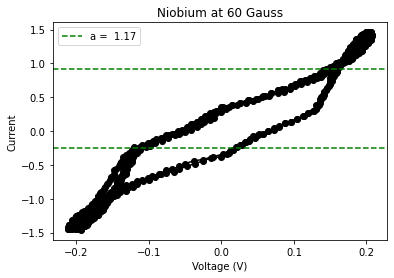

In [279]:
def linear_model(x, slope, intercept):
    return slope * x + intercept

def fit_and_plot(file_path):
    y1_values = []
    y2_values = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            y1_values.append(float(row[1]))  # Second column values
            y2_values.append(float(row[2]))  # Third column values

    # Plotting
    plt.plot(y1_values, y2_values, marker='o', linestyle='-', color='black')

    # Fitting using lmfit
    model = Model(linear_model)
    params = model.make_params(slope=1, intercept=0)

    result = model.fit(y2_values, x=y1_values, params=params)

    # Plot the fit
    # plt.plot(y1_values, result.best_fit, label='Ohmic Relationship', linestyle='--', color='red')

                 # Add horizontal lines
    plt.axhline(y=-0.25, color='green', linestyle='--', label='a =  1.17')
    plt.axhline(y=0.92, color='green', linestyle='--')

    # Customize plot if needed
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current')
    plt.title('Niobium at 60 Gauss')
    plt.legend()

    # Show the plot
    plt.show()

# Replace 'your_file.csv' with the actual path to your CSV file
fit_and_plot('NewFile5.csv')

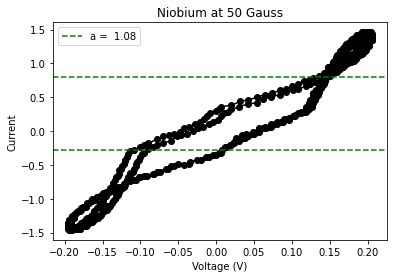

In [284]:
def linear_model(x, slope, intercept):
    return slope * x + intercept

def fit_and_plot(file_path):
    y1_values = []
    y2_values = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            y1_values.append(float(row[1]))  # Second column values
            y2_values.append(float(row[2]))  # Third column values

    # Plotting
    plt.plot(y1_values, y2_values, marker='o', linestyle='-', color='black')

    # Fitting using lmfit
    model = Model(linear_model)
    params = model.make_params(slope=1, intercept=0)

    result = model.fit(y2_values, x=y1_values, params=params)

    # Plot the fit
    # plt.plot(y1_values, result.best_fit, label='Ohmic Relationship', linestyle='--', color='red')

    
                 # Add horizontal lines
    plt.axhline(y=-0.28, color='green', linestyle='--', label='a =  1.08')
    plt.axhline(y=0.80, color='green', linestyle='--')

    # Customize plot if needed
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current')
    plt.title('Niobium at 50 Gauss')
    plt.legend()

    # Show the plot
    plt.show()

# Replace 'your_file.csv' with the actual path to your CSV file
fit_and_plot('NewFile6.csv')

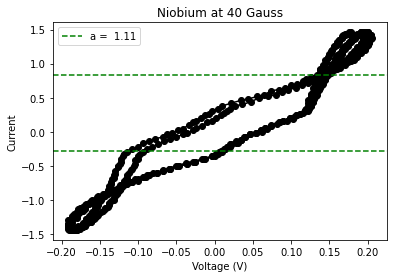

In [289]:
def linear_model(x, slope, intercept):
    return slope * x + intercept

def fit_and_plot(file_path):
    y1_values = []
    y2_values = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            y1_values.append(float(row[1]))  # Second column values
            y2_values.append(float(row[2]))  # Third column values

    # Plotting
    plt.plot(y1_values, y2_values, marker='o', linestyle='-', color='black')

    # Fitting using lmfit
    model = Model(linear_model)
    params = model.make_params(slope=1, intercept=0)

    result = model.fit(y2_values, x=y1_values, params=params)

    # Plot the fit
    # plt.plot(y1_values, result.best_fit, label='Ohmic Relationship', linestyle='--', color='red')

                     # Add horizontal lines
    plt.axhline(y=-0.28, color='green', linestyle='--', label='a =  1.11')
    plt.axhline(y=0.83, color='green', linestyle='--')

    # Customize plot if needed
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current')
    plt.title('Niobium at 40 Gauss')
    plt.legend()

    # Show the plot
    plt.show()

# Replace 'your_file.csv' with the actual path to your CSV file
fit_and_plot('NewFile7.csv')

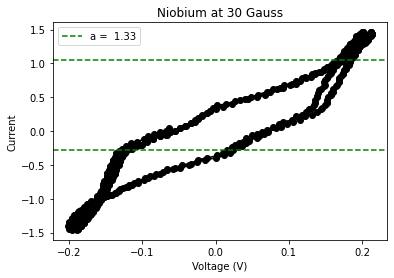

In [295]:
def linear_model(x, slope, intercept):
    return slope * x + intercept

def fit_and_plot(file_path):
    y1_values = []
    y2_values = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            y1_values.append(float(row[1]))  # Second column values
            y2_values.append(float(row[2]))  # Third column values

    # Plotting
    plt.plot(y1_values, y2_values, marker='o', linestyle='-', color='black')

    # Fitting using lmfit
    model = Model(linear_model)
    params = model.make_params(slope=1, intercept=0)

    result = model.fit(y2_values, x=y1_values, params=params)

    # Plot the fit
    # plt.plot(y1_values, result.best_fit, label='Ohmic Relationship', linestyle='--', color='red')

                         # Add horizontal lines
    plt.axhline(y=-0.28, color='green', linestyle='--', label='a =  1.33')
    plt.axhline(y=1.05, color='green', linestyle='--')


    # Customize plot if needed
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current')
    plt.title('Niobium at 30 Gauss')
    plt.legend()

    # Show the plot
    plt.show()

# Replace 'your_file.csv' with the actual path to your CSV file
fit_and_plot('NewFile8.csv')

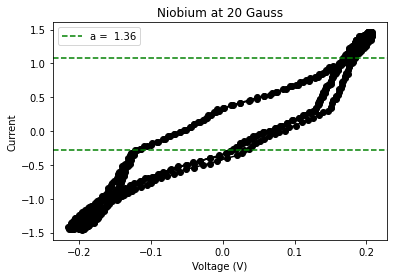

In [299]:
def linear_model(x, slope, intercept):
    return slope * x + intercept

def fit_and_plot(file_path):
    y1_values = []
    y2_values = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            y1_values.append(float(row[1]))  # Second column values
            y2_values.append(float(row[2]))  # Third column values

    # Plotting
    plt.plot(y1_values, y2_values, marker='o', linestyle='-', color='black')

    # Fitting using lmfit
    model = Model(linear_model)
    params = model.make_params(slope=1, intercept=0)

    result = model.fit(y2_values, x=y1_values, params=params)

    # Plot the fit
    # plt.plot(y1_values, result.best_fit, label='Ohmic Relationship', linestyle='--', color='red')

                             # Add horizontal lines
    plt.axhline(y=-0.28, color='green', linestyle='--', label='a =  1.36')
    plt.axhline(y=1.08, color='green', linestyle='--')

    # Customize plot if needed
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current')
    plt.title('Niobium at 20 Gauss')
    plt.legend()

    # Show the plot
    plt.show()

# Replace 'your_file.csv' with the actual path to your CSV file
fit_and_plot('NewFile9.csv')

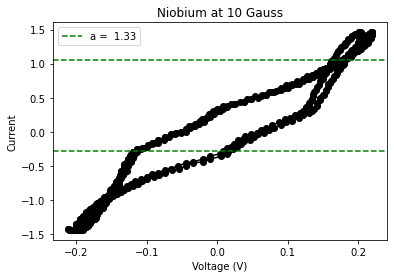

In [301]:
def linear_model(x, slope, intercept):
    return slope * x + intercept

def fit_and_plot(file_path):
    y1_values = []
    y2_values = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            y1_values.append(float(row[1]))  # Second column values
            y2_values.append(float(row[2]))  # Third column values

    # Plotting
    plt.plot(y1_values, y2_values, marker='o', linestyle='-', color='black')

    # Fitting using lmfit
    model = Model(linear_model)
    params = model.make_params(slope=1, intercept=0)

    result = model.fit(y2_values, x=y1_values, params=params)

    # Plot the fit
    # plt.plot(y1_values, result.best_fit, label='Ohmic Relationship', linestyle='--', color='red')

                                 # Add horizontal lines
    plt.axhline(y=-0.28, color='green', linestyle='--', label='a =  1.33')
    plt.axhline(y=1.05, color='green', linestyle='--')

    # Customize plot if needed
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current')
    plt.title('Niobium at 10 Gauss')
    plt.legend()

    # Show the plot
    plt.show()

# Replace 'your_file.csv' with the actual path to your CSV file
fit_and_plot('NewFile10.csv')

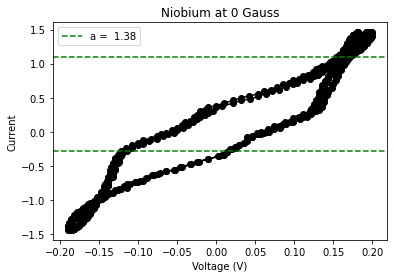

In [304]:
def linear_model(x, slope, intercept):
    return slope * x + intercept

def fit_and_plot(file_path):
    y1_values = []
    y2_values = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            y1_values.append(float(row[1]))  # Second column values
            y2_values.append(float(row[2]))  # Third column values

    # Plotting
    plt.plot(y1_values, y2_values, marker='o', linestyle='-', color='black')

    # Fitting using lmfit
    model = Model(linear_model)
    params = model.make_params(slope=1, intercept=0)

    result = model.fit(y2_values, x=y1_values, params=params)

    # Plot the fit
    # plt.plot(y1_values, result.best_fit, label='Ohmic Relationship', linestyle='--', color='red')

                                     # Add horizontal lines
    plt.axhline(y=-0.28, color='green', linestyle='--', label='a =  1.38')
    plt.axhline(y=1.10, color='green', linestyle='--')

    # Customize plot if needed
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current')
    plt.title('Niobium at 0 Gauss')
    plt.legend()

    # Show the plot
    plt.show()

# Replace 'your_file.csv' with the actual path to your CSV file
fit_and_plot('NewFile11.csv')

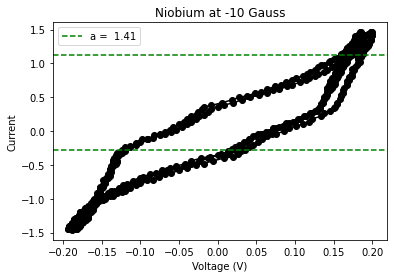

In [307]:
def linear_model(x, slope, intercept):
    return slope * x + intercept

def fit_and_plot(file_path):
    y1_values = []
    y2_values = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            y1_values.append(float(row[1]))  # Second column values
            y2_values.append(float(row[2]))  # Third column values

    # Plotting
    plt.plot(y1_values, y2_values, marker='o', linestyle='-', color='black')

    # Fitting using lmfit
    model = Model(linear_model)
    params = model.make_params(slope=1, intercept=0)

    result = model.fit(y2_values, x=y1_values, params=params)

    # Plot the fit
    # plt.plot(y1_values, result.best_fit, label='Ohmic Relationship', linestyle='--', color='red')

                                         # Add horizontal lines
    plt.axhline(y=-0.28, color='green', linestyle='--', label='a =  1.41')
    plt.axhline(y=1.13, color='green', linestyle='--')

    # Customize plot if needed
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current')
    plt.title('Niobium at -10 Gauss')
    plt.legend()

    # Show the plot
    plt.show()

# Replace 'your_file.csv' with the actual path to your CSV file
fit_and_plot('NewFile12.csv')

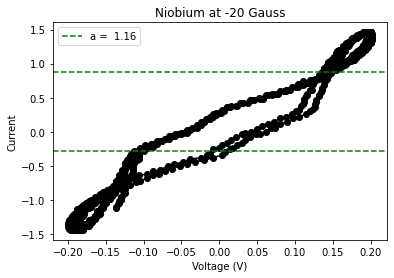

In [312]:
def linear_model(x, slope, intercept):
    return slope * x + intercept

def fit_and_plot(file_path):
    y1_values = []
    y2_values = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            y1_values.append(float(row[1]))  # Second column values
            y2_values.append(float(row[2]))  # Third column values

    # Plotting
    plt.plot(y1_values, y2_values, marker='o', linestyle='-', color='black')

    # Fitting using lmfit
    model = Model(linear_model)
    params = model.make_params(slope=1, intercept=0)

    result = model.fit(y2_values, x=y1_values, params=params)

    # Plot the fit
    # plt.plot(y1_values, result.best_fit, label='Ohmic Relationship', linestyle='--', color='red')

                                             # Add horizontal lines
    plt.axhline(y=-0.28, color='green', linestyle='--', label='a =  1.16')
    plt.axhline(y=0.88, color='green', linestyle='--')

    # Customize plot if needed
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current')
    plt.title('Niobium at -20 Gauss')
    plt.legend()

    # Show the plot
    plt.show()

# Replace 'your_file.csv' with the actual path to your CSV file
fit_and_plot('NewFile13.csv')

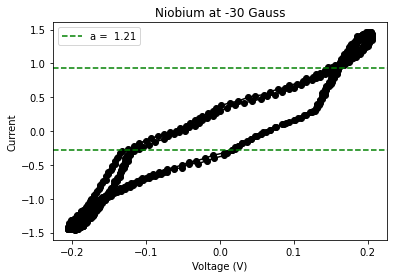

In [315]:
def linear_model(x, slope, intercept):
    return slope * x + intercept

def fit_and_plot(file_path):
    y1_values = []
    y2_values = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            y1_values.append(float(row[1]))  # Second column values
            y2_values.append(float(row[2]))  # Third column values

    # Plotting
    plt.plot(y1_values, y2_values, marker='o', linestyle='-', color='black')

    # Fitting using lmfit
    model = Model(linear_model)
    params = model.make_params(slope=1, intercept=0)

    result = model.fit(y2_values, x=y1_values, params=params)

    # Plot the fit
    # plt.plot(y1_values, result.best_fit, label='Ohmic Relationship', linestyle='--', color='red')

                                                 # Add horizontal lines
    plt.axhline(y=-0.28, color='green', linestyle='--', label='a =  1.21')
    plt.axhline(y=0.93, color='green', linestyle='--')

    # Customize plot if needed
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current')
    plt.title('Niobium at -30 Gauss')
    plt.legend()

    # Show the plot
    plt.show()

# Replace 'your_file.csv' with the actual path to your CSV file
fit_and_plot('NewFile14.csv')

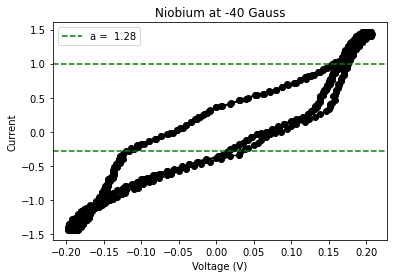

In [319]:
def linear_model(x, slope, intercept):
    return slope * x + intercept

def fit_and_plot(file_path):
    y1_values = []
    y2_values = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            y1_values.append(float(row[1]))  # Second column values
            y2_values.append(float(row[2]))  # Third column values

    # Plotting
    plt.plot(y1_values, y2_values, marker='o', linestyle='-', color='black')

    # Fitting using lmfit
    model = Model(linear_model)
    params = model.make_params(slope=1, intercept=0)

    result = model.fit(y2_values, x=y1_values, params=params)

    # Plot the fit
    # plt.plot(y1_values, result.best_fit, label='Ohmic Relationship', linestyle='--', color='red')

                                                     # Add horizontal lines
    plt.axhline(y=-0.28, color='green', linestyle='--', label='a =  1.28')
    plt.axhline(y=1, color='green', linestyle='--')

    # Customize plot if needed
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current')
    plt.title('Niobium at -40 Gauss')
    plt.legend()

    # Show the plot
    plt.show()

# Replace 'your_file.csv' with the actual path to your CSV file
fit_and_plot('NewFile15.csv')

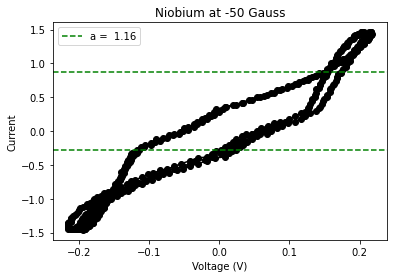

In [323]:
def linear_model(x, slope, intercept):
    return slope * x + intercept

def fit_and_plot(file_path):
    y1_values = []
    y2_values = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            y1_values.append(float(row[1]))  # Second column values
            y2_values.append(float(row[2]))  # Third column values

    # Plotting
    plt.plot(y1_values, y2_values, marker='o', linestyle='-', color='black')

    # Fitting using lmfit
    model = Model(linear_model)
    params = model.make_params(slope=1, intercept=0)

    result = model.fit(y2_values, x=y1_values, params=params)

    # Plot the fit
    # plt.plot(y1_values, result.best_fit, label='Ohmic Relationship', linestyle='--', color='red')

                                                         # Add horizontal lines
    plt.axhline(y=-0.28, color='green', linestyle='--', label='a =  1.16')
    plt.axhline(y=0.88, color='green', linestyle='--')

    # Customize plot if needed
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current')
    plt.title('Niobium at -50 Gauss')
    plt.legend()

    # Show the plot
    plt.show()

# Replace 'your_file.csv' with the actual path to your CSV file
fit_and_plot('NewFile16.csv')

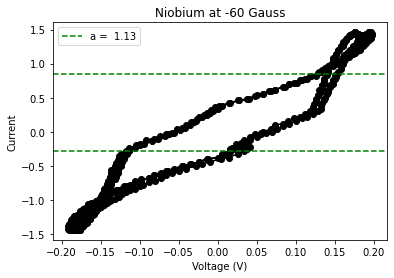

In [326]:
def linear_model(x, slope, intercept):
    return slope * x + intercept

def fit_and_plot(file_path):
    y1_values = []
    y2_values = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            y1_values.append(float(row[1]))  # Second column values
            y2_values.append(float(row[2]))  # Third column values

    # Plotting
    plt.plot(y1_values, y2_values, marker='o', linestyle='-', color='black')

    # Fitting using lmfit
    model = Model(linear_model)
    params = model.make_params(slope=1, intercept=0)

    result = model.fit(y2_values, x=y1_values, params=params)

    # Plot the fit
    # plt.plot(y1_values, result.best_fit, label='Ohmic Relationship', linestyle='--', color='red')

                                                             # Add horizontal lines
    plt.axhline(y=-0.28, color='green', linestyle='--', label='a =  1.13')
    plt.axhline(y=0.85, color='green', linestyle='--')

    # Customize plot if needed
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current')
    plt.title('Niobium at -60 Gauss')
    plt.legend()

    # Show the plot
    plt.show()

# Replace 'your_file.csv' with the actual path to your CSV file
fit_and_plot('NewFile17.csv')

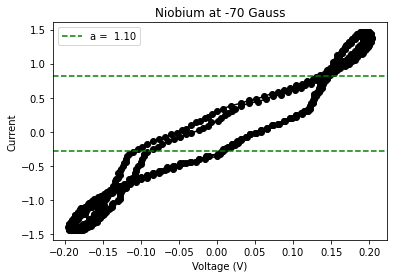

In [333]:
def linear_model(x, slope, intercept):
    return slope * x + intercept

def fit_and_plot(file_path):
    y1_values = []
    y2_values = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            y1_values.append(float(row[1]))  # Second column values
            y2_values.append(float(row[2]))  # Third column values

    # Plotting
    plt.plot(y1_values, y2_values, marker='o', linestyle='-', color='black')

    # Fitting using lmfit
    model = Model(linear_model)
    params = model.make_params(slope=1, intercept=0)

    result = model.fit(y2_values, x=y1_values, params=params)

    # Plot the fit
    # plt.plot(y1_values, result.best_fit, label='Ohmic Relationship', linestyle='--', color='red')

    
                                                             # Add horizontal lines
    plt.axhline(y=-0.28, color='green', linestyle='--', label='a =  1.10')
    plt.axhline(y=0.82, color='green', linestyle='--')

    # Customize plot if needed
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current')
    plt.title('Niobium at -70 Gauss')
    plt.legend()

    # Show the plot
    plt.show()

# Replace 'your_file.csv' with the actual path to your CSV file
fit_and_plot('NewFile18.csv')

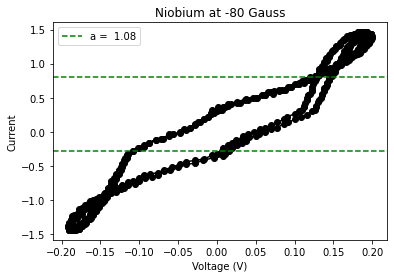

In [334]:
def linear_model(x, slope, intercept):
    return slope * x + intercept

def fit_and_plot(file_path):
    y1_values = []
    y2_values = []

    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip header if present
        for row in csv_reader:
            y1_values.append(float(row[1]))  # Second column values
            y2_values.append(float(row[2]))  # Third column values

    # Plotting
    plt.plot(y1_values, y2_values, marker='o', linestyle='-', color='black')

    # Fitting using lmfit
    model = Model(linear_model)
    params = model.make_params(slope=1, intercept=0)

    result = model.fit(y2_values, x=y1_values, params=params)

    # Plot the fit
    # plt.plot(y1_values, result.best_fit, label='Ohmic Relationship', linestyle='--', color='red')

        
                                                             # Add horizontal lines
    plt.axhline(y=-0.28, color='green', linestyle='--', label='a =  1.08')
    plt.axhline(y=0.80, color='green', linestyle='--')

    # Customize plot if needed
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current')
    plt.title('Niobium at -80 Gauss')
    plt.legend()

    # Show the plot
    plt.show()

# Replace 'your_file.csv' with the actual path to your CSV file
fit_and_plot('NewFile19.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 17
    # variables        = 3
    chi-square         = 0.08248455
    reduced chi-square = 0.00589175
    Akaike info crit   = -84.5820800
    Bayesian info crit = -82.0824400
[[Variables]]
    amplitude:  1.31514893 +/- 0.02910846 (2.21%) (init = 1.41)
    mean:      -2.49878756 +/- 4.24422185 (169.85%) (init = 0)
    sigma:      111.152917 +/- 10.5976245 (9.53%) (init = 48.98979)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = -0.714


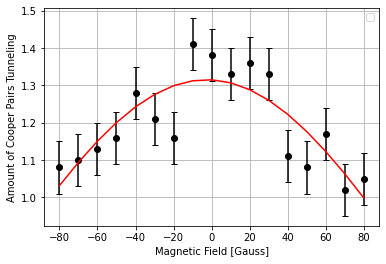

In [345]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

# Data
list_a = [1.08, 1.10, 1.13, 1.16, 1.28, 1.21, 1.16, 1.41, 1.38, 1.33, 1.36, 1.33, 1.11, 1.08, 1.17, 1.02, 1.05]
list_b = [-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80]

# Define Gaussian model function
def gaussian(x, amplitude, mean, sigma):
    return amplitude * np.exp(-(x - mean)**2 / (2 * sigma**2))

# Create an lmfit model using the Gaussian function
model = Model(gaussian)

# Estimate initial parameter values
mean_estimate = np.mean(list_b)
amplitude_estimate = np.max(list_a)
sigma_estimate = np.std(list_b)  # You might need to adjust this based on your data

# Set initial parameter values
params = model.make_params(amplitude=amplitude_estimate, mean=mean_estimate, sigma=sigma_estimate)

# Fit the model to the data
result = model.fit(list_a, x=list_b, params=params)

# Print fitting results
print(result.fit_report())

# Retrieve the residuals
residuals = result.residual

# Calculate the standard deviation of residuals
std_residuals = np.std(residuals)

# Add error bars to the original data centered on the data points
plt.errorbar(list_b, list_a, yerr=std_residuals, fmt='none', color='black', capsize=3)

# Plot the data and the fitted Gaussian
plt.plot(list_b, list_a, 'o', color='black')
plt.plot(list_b, result.best_fit, color='red')
plt.xlabel('Magnetic Field [Gauss]')
plt.ylabel('Amount of Cooper Pairs Tunneling')
plt.legend()
plt.grid(True)
plt.show()





No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[Model]]
    Model(sine)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 197
    # data points      = 17
    # variables        = 4
    chi-square         = 0.06641503
    reduced chi-square = 0.00510885
    Akaike info crit   = -86.2657688
    Bayesian info crit = -82.9329154
[[Variables]]
    amplitude:  0.14292651 +/- 0.02397640 (16.78%) (init = 0.195)
    frequency:  0.09346518 +/- 0.00107169 (1.15%) (init = 0.1)
    phase:      1.56661045 +/- 0.18026320 (11.51%) (init = 0)
    offset:     1.21172901 +/- 0.02621033 (2.16%) (init = 1.197647)
[[Correlations]] (unreported correlations are < 0.100)
    C(frequency, offset)    = -0.745
    C(amplitude, frequency) = 0.166


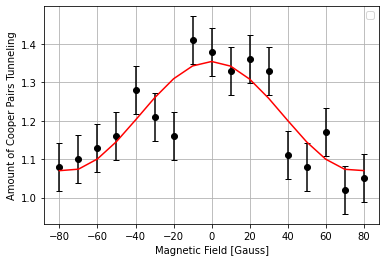

In [346]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

# Data
list_a = [1.08, 1.10, 1.13, 1.16, 1.28, 1.21, 1.16, 1.41, 1.38, 1.33, 1.36, 1.33, 1.11, 1.08, 1.17, 1.02, 1.05]
list_b = [-80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80]

# Define Sine model function
def sine(x, amplitude, frequency, phase, offset):
    return amplitude * np.sin(2 * np.pi * frequency * x + phase) + offset

# Create an lmfit model using the Sine function
model = Model(sine)

# Estimate initial parameter values
amplitude_estimate = (np.max(list_a) - np.min(list_a)) / 2
frequency_estimate = 0.1  # You might need to adjust this based on your data
phase_estimate = 0
offset_estimate = np.mean(list_a)

# Set initial parameter values
params = model.make_params(amplitude=amplitude_estimate, frequency=frequency_estimate, phase=phase_estimate, offset=offset_estimate)

# Fit the model to the data
result = model.fit(list_a, x=list_b, params=params)

# Print fitting results
print(result.fit_report())

# Retrieve the residuals
residuals = result.residual

# Calculate the standard deviation of residuals
std_residuals = np.std(residuals)

# Add error bars to the original data centered on the data points
plt.errorbar(list_b, list_a, yerr=std_residuals, fmt='none', color='black', capsize=3)

# Plot the data and the fitted Sine curve
plt.plot(list_b, list_a, 'o', color='black')
plt.plot(list_b, result.best_fit, color='red')
plt.xlabel('Magnetic Field [Gauss]')
plt.ylabel('Amount of Cooper Pairs Tunneling')
plt.legend()
plt.grid(True)
plt.show()
